In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import spearmanr



In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Data Preperation Module 3
# There are 3 Files in this Module
# Module 3
# m3mg,m3ml,m3og

module3mg = pd.read_csv('Module3-MoodleGrades.csv')

In [7]:
module3ml = pd.read_csv('Module3-MoodleLogs.csv', low_memory=False)

In [8]:
module3og = pd.read_csv('Module3-OwnGrades.csv')

In [9]:
print (module3mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Class Test (Real)', 'Assignment: Final CA Grade (out of 100%) (Real)', 'Assignment: Lab 1 (Real)', 'Assignment: Lab 2 (Real)', 'Assignment: Lab 3 (Real)', 'Assignment: Lab 4  (Real)', 'Assignment: Lab 5 (Real)', 'Assignment: Lab 6 (Real)', 'Assignment: PCL (Real)', 'Assignment: RCL (Real)', 'Assignment: Worksheets 1&2 (Real)', 'Quiz: Quiz 1 (Real)', 'Quiz: Quiz 2 (Real)', 'Quiz: Quiz 3 (Real)', 'Quiz: Quiz 4 (Real)', 'Quiz: Quiz 5 (Real)', 'Quiz: Quiz 6 (Real)', 'Quiz: Quiz 7 (Real)', 'Quiz: Quiz 8 (Real)']


In [10]:
# Print the number of unique values in each modul3ml column
print(module3ml.nunique())

Time              8933
User full name      63
Affe CTed user       1
Event context        1
Component           11
Event name          25
Description         42
Origin               2
IP address           1
dtype: int64


In [11]:
# Print the number of unique values in each modul3mg column
print(module3mg.nunique())

First name                                         63
Surname                                            63
ID number                                          63
Email address                                      63
Course total (Real)                                58
Last downloaded from this course                    2
Assignment: Class Test (Real)                      21
Assignment: Final CA Grade (out of 100%) (Real)    46
Assignment: Lab 1 (Real)                           26
Assignment: Lab 2 (Real)                           26
Assignment: Lab 3 (Real)                           24
Assignment: Lab 4  (Real)                          22
Assignment: Lab 5 (Real)                           23
Assignment: Lab 6 (Real)                           17
Assignment: PCL (Real)                             30
Assignment: RCL (Real)                              2
Assignment: Worksheets 1&2 (Real)                   1
Quiz: Quiz 1 (Real)                                38
Quiz: Quiz 2 (Real)         

In [12]:
# Print the number of unique values in each modul3mg column
print(module3og.nunique())

First name    63
Surname       63
ID number     63
Total CA      59
Exam          39
Total         58
dtype: int64


In [13]:
# Columns3 Tidy Up
# Cleanup3
# time3

In [14]:
#time3
time3 = module3ml["Time"].str.split(",", n = 1, expand = True)

In [15]:
# making separate Date column from new data frame 
module3ml["Date"]= time3[0] 

# making seperate Time column from new data frame
module3ml['Time']= time3[1]


In [16]:
# Convert the date column to datetime64
module3ml.Date = pd.to_datetime(module3ml.Date)

In [17]:
# Drop columns
module3ml = module3ml.drop(module3ml[['IP address','Origin','Description','Affe CTed user']], axis=1)

In [18]:
#Remove activity outside semester start and end dates range -Timeedit2
mask3 = (module3ml['Date'] >= StartDate) & (module3ml['Date'] <= EndDate)

module3ml = module3ml.loc[mask3]

len(module3ml)

13862

In [19]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_3 = (module3ml['Date'] >= StartDate) & (module3ml['Date'] <= TriOne)

FirstFive3 = module3ml.loc[week5_3]

len(FirstFive3)


4390

In [20]:

#Remove activity outside semester start and end dates range -Timeedit1
week10_3 = (module3ml['Date'] >= TriOne) & (module3ml['Date'] <= TriTwo)

FirstTen3 = module3ml.loc[week10_3]

len(FirstTen3)


6094

In [21]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_3 = (module3ml['Date'] >= TriTwo) & (module3ml['Date'] <= EndDate)

FirstFivt3 = module3ml.loc[week15_3]

len(FirstFivt3)


3963

In [22]:
module3ml.head(2)

,Time,User full name,Event context,Component,Event name,Date
71,18:35,aJGs bxon,Event context,System,Course viewed,2019-01-21
72,18:34,aJGs bxon,Event context,System,Course viewed,2019-01-21


In [23]:
#Split string User full name which adds two new columns
# new data frame with split value columns 
new3 = module3ml["User full name"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame 
module3ml["First name"]= new3[0] 

# making separate last name column from new data frame 
module3ml["Last name"]= new3[1] 


In [24]:
module3ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
71,18:35,aJGs bxon,Event context,System,Course viewed,2019-01-21,aJGs,bxon
72,18:34,aJGs bxon,Event context,System,Course viewed,2019-01-21,aJGs,bxon


In [25]:
len(module3ml)

13862

In [26]:
m3ml_subset = module3ml


In [27]:
module3ml_onehot = m3ml_subset.copy()
module3ml_onehot = pd.get_dummies(module3ml_onehot, columns=['Event name'], prefix = ['Event name'])
module3ml_onehot = pd.get_dummies(module3ml_onehot, columns=['Event context'], prefix = ['Event context'])
module3ml_onehot = pd.get_dummies(module3ml_onehot, columns=['Component'], prefix = ['Component'])


print(module3ml_onehot.head())

### Onehot2
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data

      Time User full name       Date First name Last name  \
71   18:35      aJGs bxon 2019-01-21       aJGs      bxon   
72   18:34      aJGs bxon 2019-01-21       aJGs      bxon   
73   18:16      aOmN bXsd 2019-01-21       aOmN      bXsd   
74   18:16      aOmN bXsd 2019-01-21       aOmN      bXsd   
75   18:15      aOmN bXsd 2019-01-21       aOmN      bXsd   

    Event name_A file has been uploaded.  \
71                                     0   
72                                     0   
73                                     0   
74                                     0   
75                                     0   

    Event name_A submission has been submitted.  \
71                                            0   
72                                            0   
73                                            0   
74                                            0   
75                                            0   

    Event name_Badge listing viewed  \
71                    

In [28]:
module3ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
71,18:35,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,18:34,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
m3ml_subset.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
71,18:35,aJGs bxon,Event context,System,Course viewed,2019-01-21,aJGs,bxon
72,18:34,aJGs bxon,Event context,System,Course viewed,2019-01-21,aJGs,bxon


In [30]:
module3og.head(3)

,First name,Surname,ID number,Total CA,Exam,Total
0,auP2,buYz,PuP2uYzI,77.7140,49.0,63.3570
1,aBlD,bnnW,mBlDnnWk,0.0000,NaN,0.0000
2,aTka,b80f,wTka80ff,53.0216,51.0,52.0108


In [31]:
#Engaged = > 55
disengaged3 = module3og['Total'] < 55


In [32]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module3og['disengaged'] = np.where(module3og['Total']<=55, '1', '0')


In [33]:

module3og['disengaged'] = pd.to_numeric(module3og['disengaged'])


In [34]:
print(module3og['disengaged'].value_counts(dropna=False))

1    52
0    11
Name: disengaged, dtype: int64


In [35]:
module3og.dtypes

First name     object
Surname        object
ID number      object
Total CA      float64
Exam          float64
Total         float64
disengaged      int64
dtype: object

In [36]:
m3og_subset = module3og

In [37]:
#Merge_subset3_1
merge_subset3 = pd.merge(module3ml_onehot,m3og_subset[['First name','disengaged']],on='First name', how='left')

In [38]:
#merge_subset3_1
merge_subset3.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report,disengaged
0,18:35,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,18:34,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [39]:
#Feature selection3_1
X3s = merge_subset3.iloc[:,5:41]  #independent columns
y3s = merge_subset3.iloc[:,-1]    #target column i.e engaged


In [40]:
X3s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,Event name_Grade user report viewed,...,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
y3s.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [42]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X3s,y3s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X3s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                            Specs     Score
4                 Event name_Course module viewed  9.137456
27                                 Component_File  7.532799
14                 Event name_Quiz attempt viewed  7.458128
3   Event name_Course module instance list viewed  7.434958
22                    Event name_User list viewed  6.729543
15                       Event name_Role assigned  5.074340
20             Event name_User enrolled in course  5.074340
10               Event name_Quiz attempt reviewed  4.278265
9             Event name_Grade user report viewed  3.622155
35                          Component_User report  3.622155


[ 0.0002514   0.00124727  0.00954387  0.08894618  0.05988711  0.00571477
  0.01441009  0.00493745  0.00452287  0.01576672  0.04823948  0.01175843
  0.00467103  0.0114278   0.0899661   0.05875948  0.00042821  0.00382411
  0.00878215  0.00017995  0.06502128  0.00549413  0.08455313  0.02569557
  0.          0.13545144  0.00525822  0.0564178   0.00021449  0.00745318
  0.01727089  0.04061673  0.06739207  0.01438168  0.0040626   0.02745232]


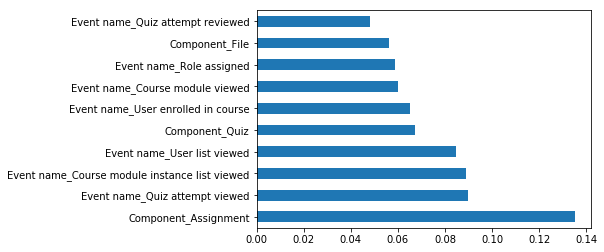

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X3s,y3s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X3s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


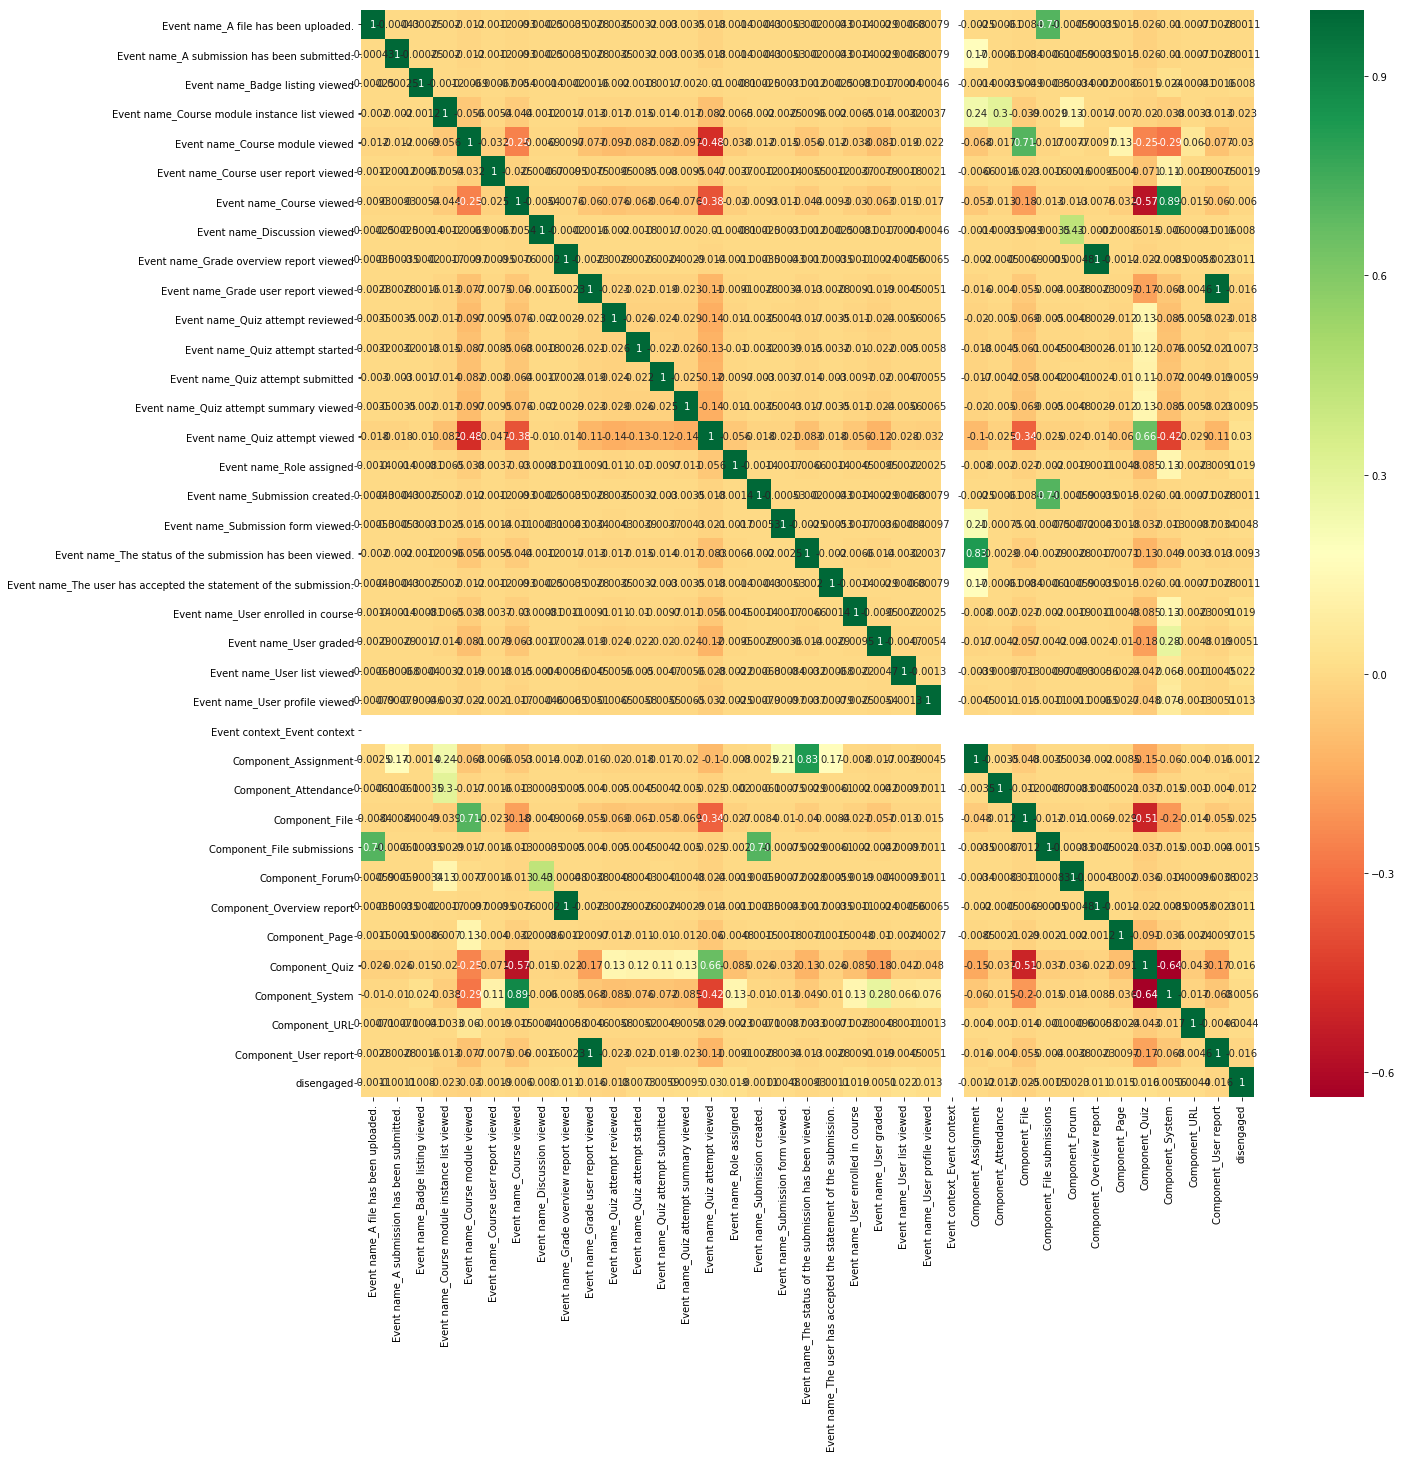

In [44]:
#get correlations of each features in dataset
corrmat = merge_subset3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset3[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [45]:
#EndFS3.1
# 4                 Event name_Course module viewed  9.137456
#27                                 Component_File  7.532799
#14                 Event name_Quiz attempt viewed  7.458128
#3   Event name_Course module instance list viewed  7.434958
#22                    Event name_User list viewed  6.729543
#15                       Event name_Role assigned  5.074340
#20             Event name_User enrolled in course  5.074340
#10               Event name_Quiz attempt reviewed  4.278265
#9             Event name_Grade user report viewed  3.622155
#35                          Component_User report  3.622155
#
#

In [46]:
featselect3 = X3s[['Event name_Course module viewed','Component_File','Event name_Quiz attempt viewed','Event name_Course module instance list viewed','Event name_User list viewed','Event name_Role assigned','Event name_User enrolled in course','Event name_Quiz attempt reviewed','Event name_Grade user report viewed','Component_User report']]

In [47]:
Xfs3 = featselect3 # Features
yfs3 = y3s # Target variable


In [48]:
Xfs3.head(2)

,Event name_Course module viewed,Component_File,Event name_Quiz attempt viewed,Event name_Course module instance list viewed,Event name_User list viewed,Event name_Role assigned,Event name_User enrolled in course,Event name_Quiz attempt reviewed,Event name_Grade user report viewed,Component_User report
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0


In [49]:
yfs3.head()

0    1
1    1
2    0
3    0
4    0
Name: disengaged, dtype: int64

In [50]:
# Split dataset into training set and test set
Xfs3_train, Xfs3_test, yfs3_train, yfs3_test = train_test_split(Xfs3, yfs3, test_size=0.3, random_state=1) # 70% training and 30% test


In [51]:
# Create Decision Tree classifer object
dtclffs3 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs3 = dtclffs3.fit(Xfs3_train,yfs3_train)

#Predict the response for test dataset
yfs3_pred = dtclffs3.predict(Xfs3_test)


In [52]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(dtclffs3, Xfs3_train, yfs3_train, cv = 10)
print(np.mean(cvscores_10))

0.690405191885


In [53]:

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs3_test, yfs3_pred))
# 69 %


Accuracy: 0.6900697283


In [54]:
yfs3_test.head(5)

6537    1
3181    1
6410    1
5199    0
9502    0
Name: disengaged, dtype: int64

In [55]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs3_test, yfs3_pred))


0.6900697283


In [56]:
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs3_test, yfs3_pred))


1.0


In [57]:
print("Accuracy:",metrics.accuracy_score(yfs3_test, yfs3_pred))
print("Precision:",metrics.precision_score(yfs3_test, yfs3_pred))
print("Recall:",metrics.recall_score(yfs3_test, yfs3_pred))
print("F1 Score",metrics.f1_score(yfs3_test, yfs3_pred))


Accuracy: 0.6900697283
Precision: 0.6900697283
Recall: 1.0
F1 Score 0.816616872955


In [58]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs3 = LogisticRegression()

# fit the model with data
logregfs3.fit(Xfs3_train,yfs3_train)

#
ylg3_pred=logregfs3.predict(Xfs3_test)


In [59]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregfs3, Xfs3_train, yfs3_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregfs3, Xfs3_train, yfs3_train, cv = 10)
print(np.mean(cvscores_10))

0.690405044037
0.690405191885


In [60]:
from sklearn import metrics
cnflr3_matrix = metrics.confusion_matrix(yfs3_test, ylg3_pred)
cnflr3_matrix


array([[   0, 1289],
       [   0, 2870]], dtype=int64)

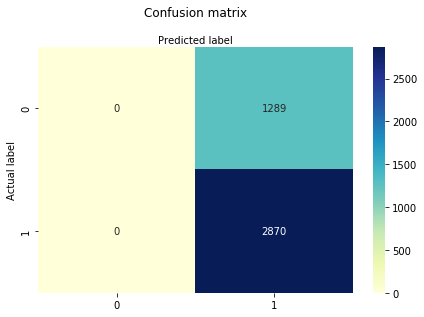

In [61]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr3_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#TP 2870
#TN = 0
#FP = 0
#FN = 1289


In [62]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs3_test, yfs3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs3_test, yfs3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs3_test, yfs3_pred)))

Mean Absolute Error: 0.3099302717
Mean Squared Error: 0.3099302717
Root Mean Squared Error: 0.556713814899


In [63]:
#MissingValues3

In [64]:
merge_subset3_nullity = merge_subset3.isnull()

In [65]:
merge_subset3_nullity.mean() * 100


# Calculate percentage of missing values
missing_values_percent = merge_subset3_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

# 5.8 percent of missing values

Percentage of Missing Values:
 Time                                                                 0.0
User full name                                                       0.0
Date                                                                 0.0
First name                                                           0.0
Last name                                                            0.0
Event name_A file has been uploaded.                                 0.0
Event name_A submission has been submitted.                          0.0
Event name_Badge listing viewed                                      0.0
Event name_Course module instance list viewed                        0.0
Event name_Course module viewed                                      0.0
Event name_Course user report viewed                                 0.0
Event name_Course viewed                                             0.0
Event name_Discussion viewed                                         0.0
Event name_Grade ove

In [66]:
merge_subset3_nullity.sum()

# Calculate total of missing values
missing_values_sum = merge_subset3_nullity.sum()

In [67]:
merge_subset3_nullity.tail(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report,disengaged
13860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
print('Total Missing Values:\n', missing_values_sum)

Total Missing Values:
 Time                                                                 0
User full name                                                       0
Date                                                                 0
First name                                                           0
Last name                                                            0
Event name_A file has been uploaded.                                 0
Event name_A submission has been submitted.                          0
Event name_Badge listing viewed                                      0
Event name_Course module instance list viewed                        0
Event name_Course module viewed                                      0
Event name_Course user report viewed                                 0
Event name_Course viewed                                             0
Event name_Discussion viewed                                         0
Event name_Grade overview report viewed               

In [69]:
m3mg = module3mg[['First name', 'Surname', 'ID number', 'Course total (Real)', 'Assignment: Class Test (Real)', 'Assignment: Final CA Grade (out of 100%) (Real)', 'Assignment: Lab 1 (Real)', 'Assignment: Lab 2 (Real)', 'Assignment: Lab 3 (Real)', 'Assignment: Lab 4  (Real)', 'Assignment: Lab 5 (Real)', 'Assignment: Lab 6 (Real)', 'Assignment: PCL (Real)', 'Assignment: RCL (Real)', 'Quiz: Quiz 1 (Real)', 'Quiz: Quiz 2 (Real)', 'Quiz: Quiz 3 (Real)', 'Quiz: Quiz 4 (Real)', 'Quiz: Quiz 5 (Real)', 'Quiz: Quiz 6 (Real)', 'Quiz: Quiz 7 (Real)', 'Quiz: Quiz 8 (Real)']]

In [70]:
#Trimester1

In [71]:
FirstFive3.head(2)

,Time,User full name,Event context,Component,Event name,Date
4563,23:55,aTcu bg6b,Event context,Quiz,Quiz attempt viewed,2018-10-12
4564,23:49,aA6B bBfk,Event context,System,Course viewed,2018-10-12


In [72]:
m3og_subset.head(2)

,First name,Surname,ID number,Total CA,Exam,Total,disengaged
0,auP2,buYz,PuP2uYzI,77.714,49.0,63.357,0
1,aBlD,bnnW,mBlDnnWk,0.000,NaN,0.000,1


In [73]:
FirstFive3_onehot = FirstFive3.copy()
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive3_onehot.head())


        Time User full name       Date  Event name_A file has been uploaded.  \
4563   23:55      aTcu bg6b 2018-10-12                                     0   
4564   23:49      aA6B bBfk 2018-10-12                                     0   
4565   23:42      aTcu bg6b 2018-10-12                                     0   
4566   23:42      aTcu bg6b 2018-10-12                                     0   
4567   23:42      aTcu bg6b 2018-10-12                                     0   

      Event name_A submission has been submitted.  \
4563                                            0   
4564                                            0   
4565                                            0   
4566                                            0   
4567                                            0   

      Event name_Course module instance list viewed  \
4563                                              0   
4564                                              0   
4565                               

In [74]:
FirstFive3_onehot.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Grade user report viewed,...,Component_Assignment,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
4563,23:55,aTcu bg6b,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4564,23:49,aA6B bBfk,2018-10-12,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
m3og_subset.head(2)

,First name,Surname,ID number,Total CA,Exam,Total,disengaged
0,auP2,buYz,PuP2uYzI,77.714,49.0,63.357,0
1,aBlD,bnnW,mBlDnnWk,0.000,NaN,0.000,1


In [76]:
#Split string User full name which adds two new columns
# new data frame with split value columns 
new3a = FirstFive3_onehot["User full name"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame 
FirstFive3_onehot["First name"]= new3a[0] 

# making separate last name column from new data frame 
FirstFive3_onehot["Last name"]= new3a[1] 


In [78]:
merge_53 = pd.merge(FirstFive3_onehot,m3og_subset[['First name','disengaged']],on='First name', how='left')